In [1]:
!pip install scikit-learn -q
!pip install pandas -q
!pip install seaborn -q
!pip install numpy -q
!pip install xgboost -q


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
import xgboost as xgb


In [4]:
df = pd.read_csv(r"total_clean_data.csv")


In [6]:
# numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include=['object'])


In [7]:
df.dtypes

customer_id                           int64
first_name                           object
last_name                            object
country                              object
age                                   int64
gender                               object
income_level                          int64
Winning_percentage                    int64
Days_Since_Last_Bet                 float64
Active_Days                         float64
Total_Number_of_Bets                float64
Total_Amount_Wagered                float64
Average_Bet_Amount                  float64
Number_of_Bonuses_Received          float64
Amount_of_Bonuses_Received          float64
Revenue_from_Bonuses                float64
Increase_in_Bets_After_Bonus        float64
Increase_in_wagering_after_Bonus    float64
Should_Receive_Bonus                  int64
dtype: object

In [8]:
# Calculate statistical measures for each numerical column
statistics = df.describe().T
statistics['mean'] = df_num.mean()
statistics['median'] = df_num.median()
statistics['variance'] = df_num.var()
statistics['stdev'] = df_num.std()
statistics['skewness'] = df_num.skew()
statistics['kurtosis'] = df_num.kurtosis()

# Selecting the relevant columns for output
statistics = statistics[['mean', 'median', 'variance', 'stdev', 'skewness', 'kurtosis']]

# Display the statistics
print(statistics)

                                        mean   median      variance  \
customer_id                        5388.6336   5402.0  6.061340e+06   
age                                  49.2768     50.0  3.137613e+02   
income_level                      83197.1966  82739.0  1.509175e+09   
Winning_percentage                   42.2168     43.0  4.720998e+02   
Days_Since_Last_Bet                  20.7096     20.0  1.390043e+02   
Active_Days                         227.1254    228.0  6.757754e+03   
Total_Number_of_Bets                 34.9712     36.0  9.649887e+01   
Total_Amount_Wagered              89207.9960  92525.0  1.352912e+08   
Average_Bet_Amount                  976.7500    992.0  4.804476e+03   
Number_of_Bonuses_Received           99.4244    100.0  1.901449e+01   
Amount_of_Bonuses_Received          997.3970   1000.0  1.123844e+03   
Revenue_from_Bonuses               4991.8774   5000.0  2.198658e+04   
Increase_in_Bets_After_Bonus        499.5344    500.0  1.795319e+02   
Increa

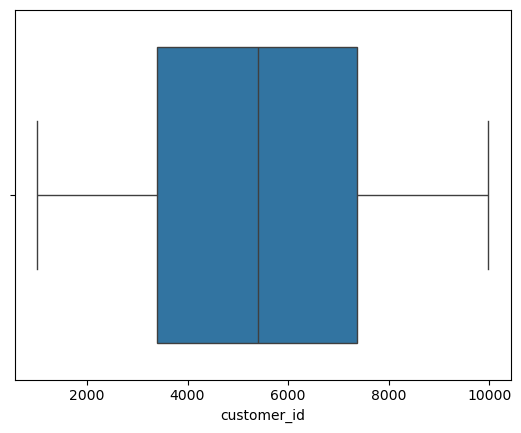

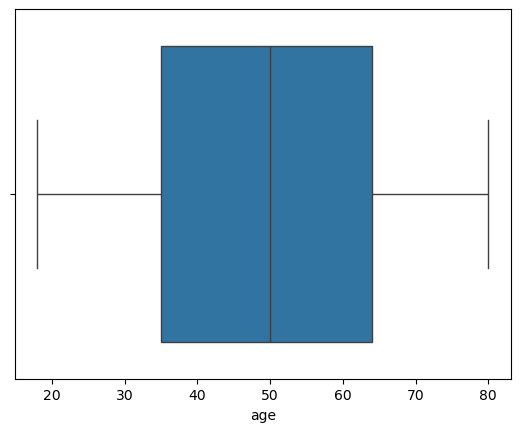

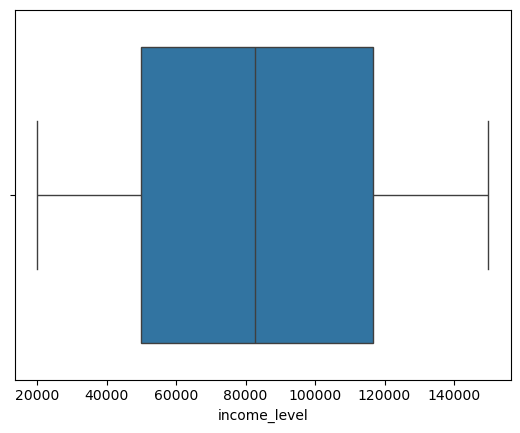

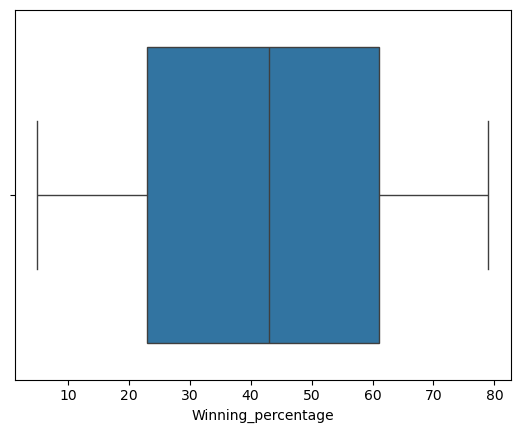

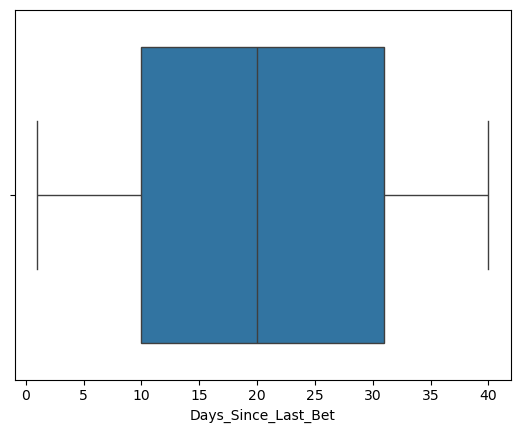

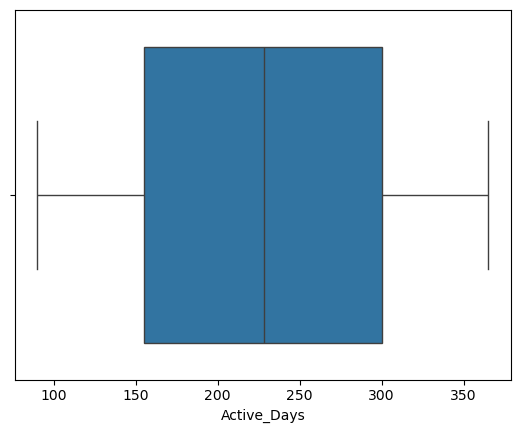

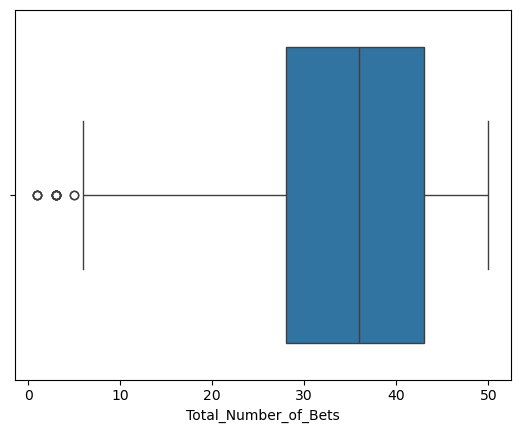

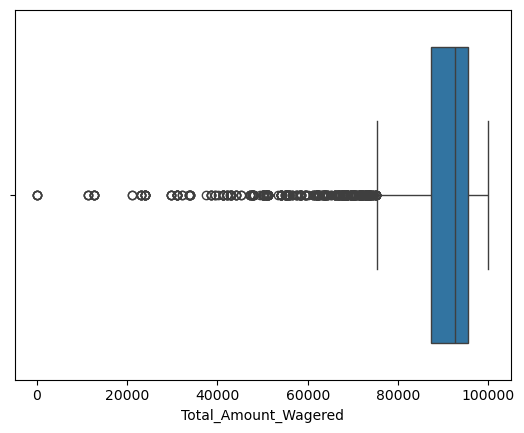

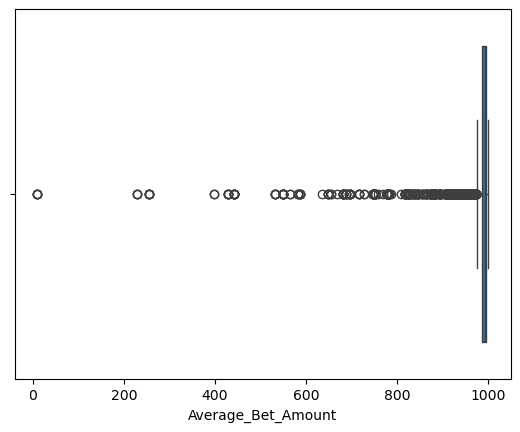

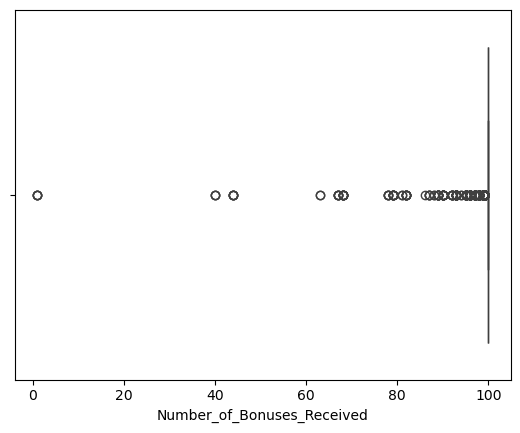

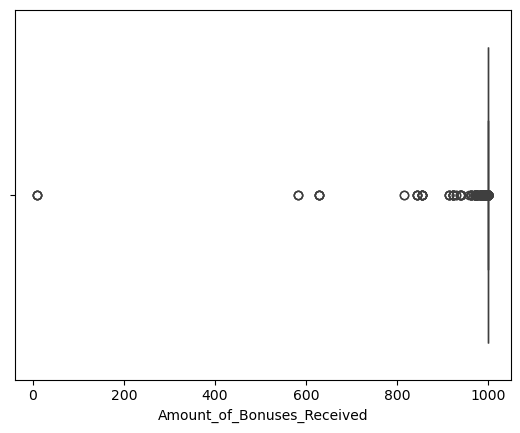

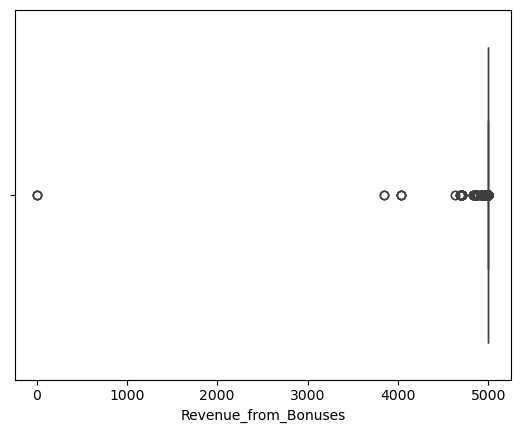

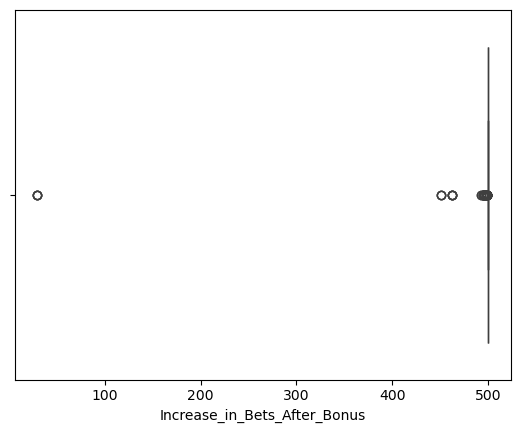

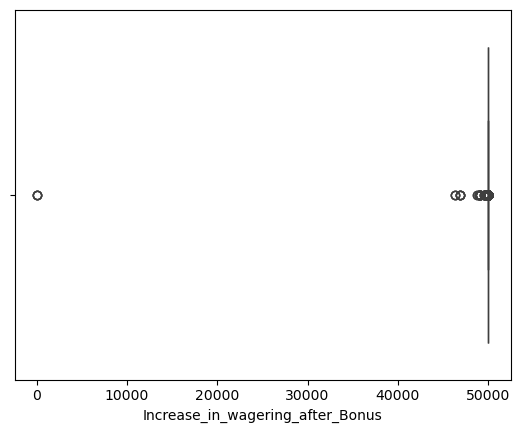

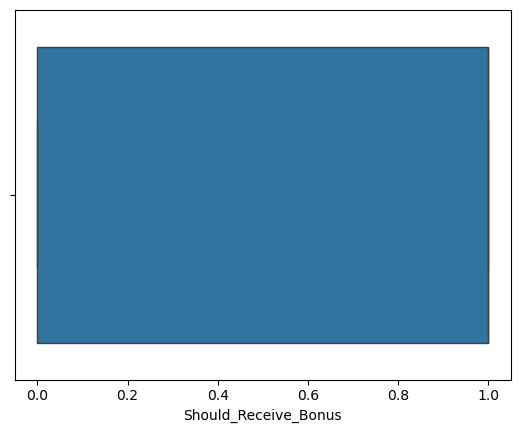

In [9]:
# Finding outliers of numerical columns using for loop and boxplot
for col in df_num.columns:
    plt.figure()
    sns.boxplot(x=df_num[col])

In [11]:
# Define the range conditions
conditions = (
    (df['age'].between(18, 80)) &
    (df['income_level'].between(20000, 150000)) &
    (df['Winning_percentage'].between(5, 80)) &
    (df['Days_Since_Last_Bet'].between(1, 40)) &
    (df['Active_Days'].between(1, 40)) &
    (df['Total_Amount_Wagered'].between(100, 100000)) &
    (df['Average_Bet_Amount'].between(10, 1000)) &
    (df['Number_of_Bonuses_Received'].between(1, 100)) &
    (df['Amount_of_Bonuses_Received'].between(10, 1000)) &
    (df['Revenue_from_Bonuses'].between(10, 5000)) &
    (df['Increase_in_Bets_After_Bonus'].between(80, 500)) &
    (df['Increase_in_wagering_after_Bonus'].between(100, 50000)) &
    (df['Should_Receive_Bonus'].isin([0, 1]))
)

# Apply the conditions to filter the DataFrame
filtered_df = df[conditions]

# Ensure records with min and max in the specified ranges are included
for col, min_val, max_val in [
    ('age', 18, 80),
    ('income_level', 20000, 150000),
    ('Winning_percentage', 5, 80),
    ('Days_Since_Last_Bet', 1, 40),
    ('Active_Days', 1, 40),
    ('Total_Amount_Wagered', 100, 100000),
    ('Average_Bet_Amount', 10, 1000),
    ('Number_of_Bonuses_Received', 1, 100),
    ('Amount_of_Bonuses_Received', 10, 1000),
    ('Revenue_from_Bonuses', 10, 5000),
    ('Increase_in_Bets_After_Bonus', 80, 500),
    ('Increase_in_wagering_after_Bonus', 100, 50000)
]:
    filtered_df = pd.concat([
        filtered_df,
        df[df[col] == min_val],
        df[df[col] == max_val]
    ]).drop_duplicates()



In [14]:

df_winsorized = df.copy()
for column in df.select_dtypes(include=[np.number]).columns:
    df_winsorized[column] = winsorize(df[column], limits=[0.05, 0.05])

NameError: name 'winsorize' is not defined

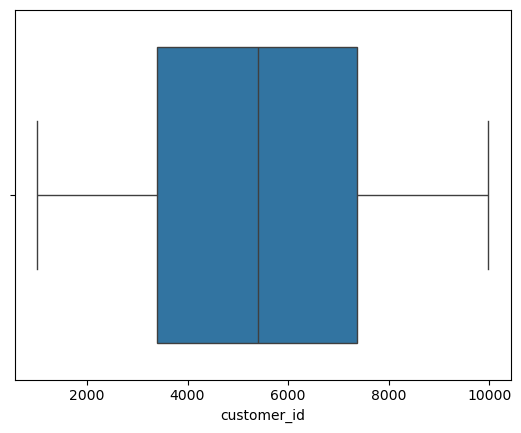

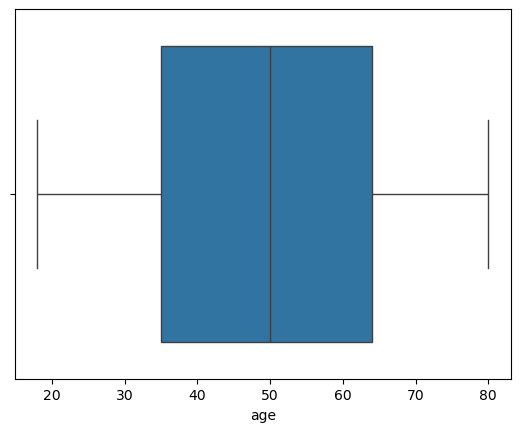

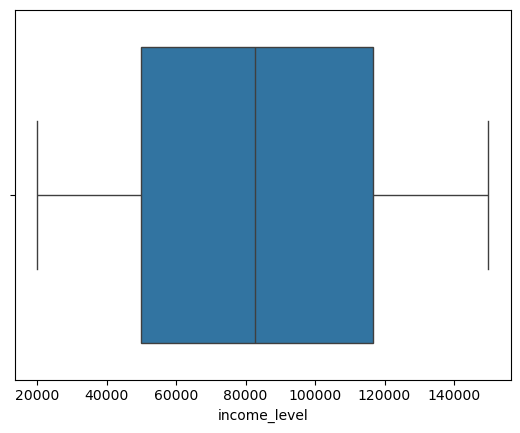

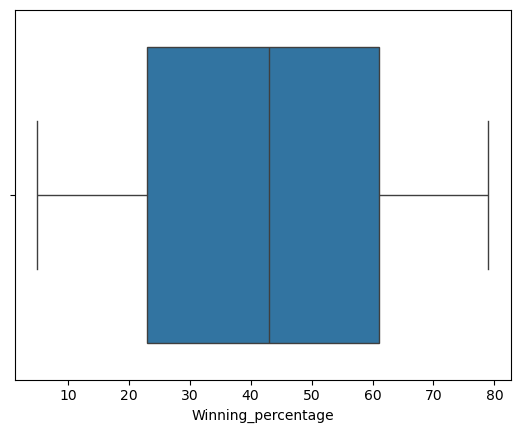

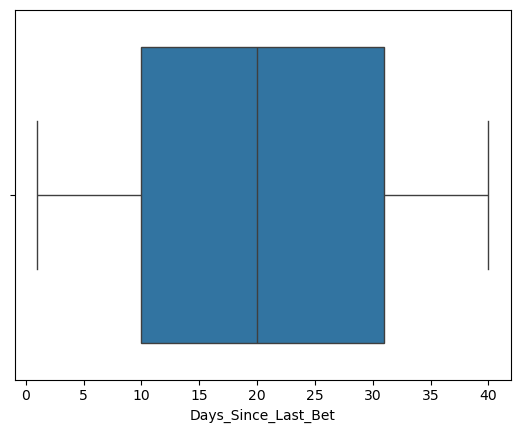

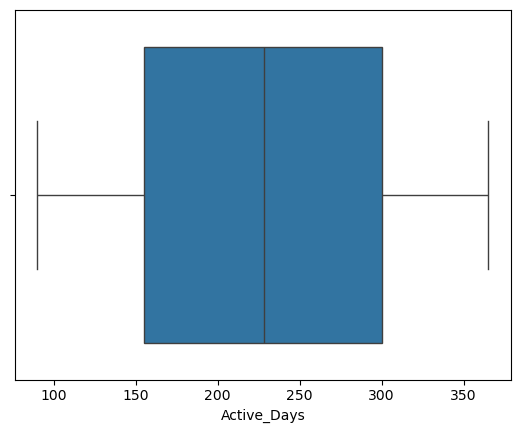

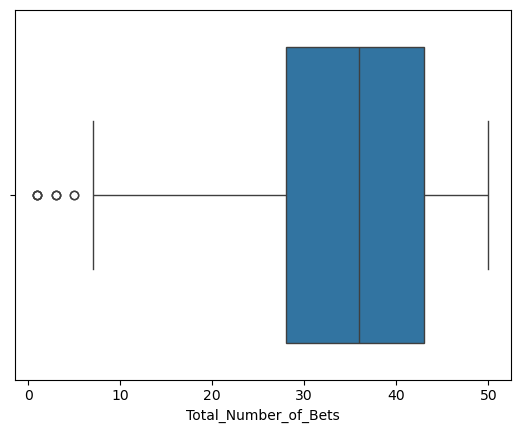

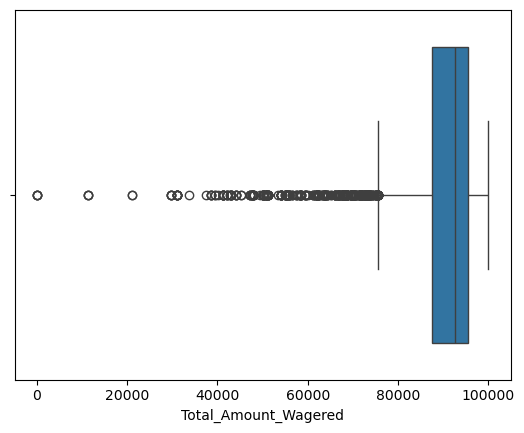

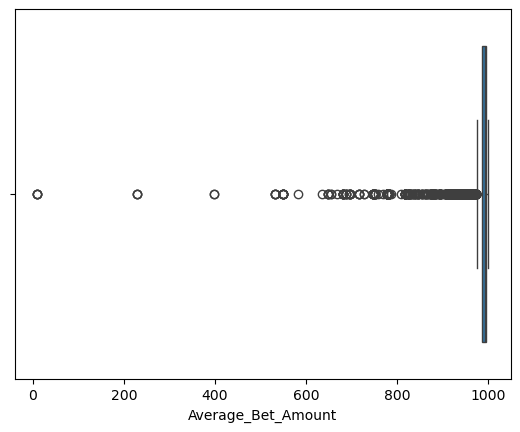

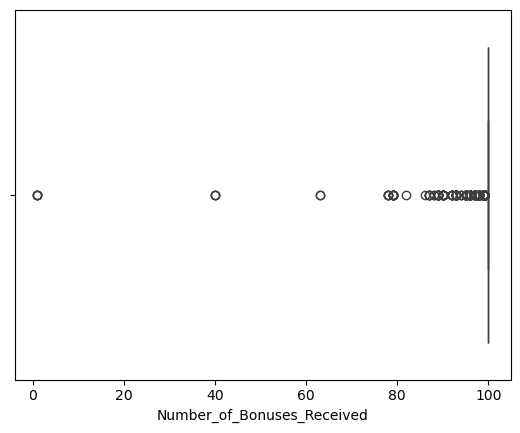

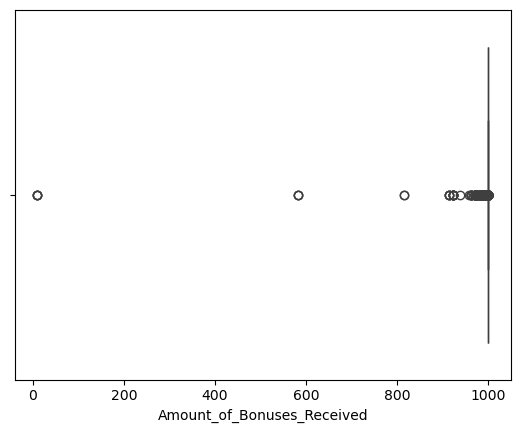

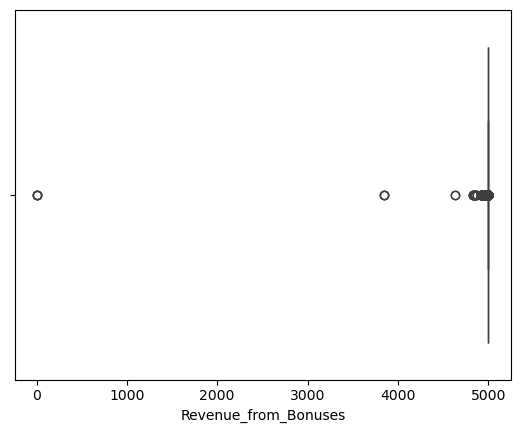

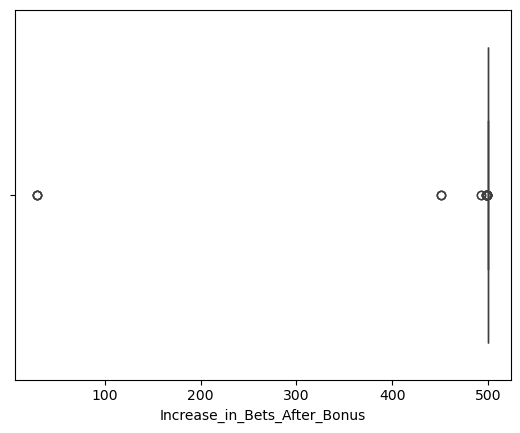

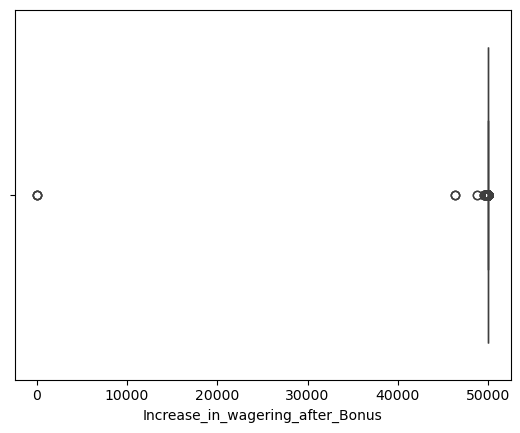

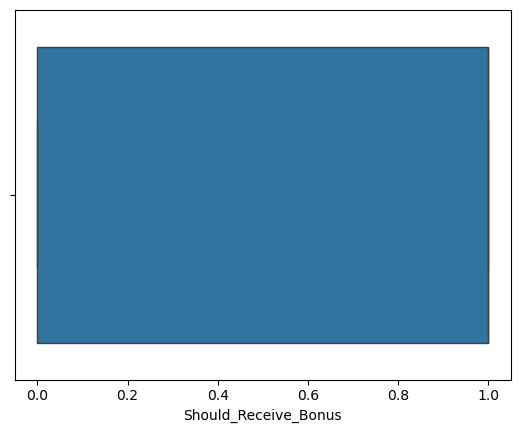

In [13]:
# Display the filtered DataFrame
filtered_df.head()
fil_df_num = filtered_df.select_dtypes(include=['int64', 'float64'])
for col in fil_df_num.columns:
    plt.figure()
    sns.boxplot(x=fil_df_num[col])  

In [15]:
#Columns with greater than zero variance
fil_df_num.var()[fil_df_num.var() > 0].count()


15

In [29]:
X = filtered_df[['age', 'income_level', 'Winning_percentage', 'Days_Since_Last_Bet', 'Active_Days', 'Total_Number_of_Bets', 'Total_Amount_Wagered', 'Average_Bet_Amount', 'Number_of_Bonuses_Received']]
y = filtered_df['Should_Receive_Bonus']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score

print("Accracy of the Random Forest Model:-",accuracy_score(y_test, y_pred))

Accracy of the Random Forest Model:- 0.9698492462311558


In [17]:
# Code to find Precision, Recall, and F1 Score
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.971
Recall: 0.987
F1 Score: 0.979


In [18]:
# Train accuracy and test accuracy
print('Train Accuracy: %.3f' % rf.score(X_train, y_train))
print('Test Accuracy: %.3f' % rf.score(X_test, y_test))

Train Accuracy: 1.000
Test Accuracy: 0.970


In [21]:
# Code to save the Randomforest model
import pickle
pickle.dump(rf, open('model_rf.pkl', 'wb'))
import os 
os.getcwd() 

'c:\\Users\\sm689\\Desktop\\Project_Deatils\\1.InternShip Projects\\3.Bonous_Allcation_Prok\\Working_Code'

In [28]:
# XG Boost code to build the model

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

from sklearn.metrics import accuracy_score

print("Accuracy of the XGB  model:-",accuracy_score(y_test, y_pred))

# Train accuracy and test accuracy of XG Boost model
print('Train Accuracy: %.3f' % xgb.score(X_train, y_train))
print('Test Accuracy: %.3f' % xgb.score(X_test, y_test))

# Code to save the XG Boost model
import pickle
pickle.dump(xgb, open('xgb_model.pkl', 'wb'))

Accuracy of the XGB  model:- 0.9738693467336683
Train Accuracy: 1.000
Test Accuracy: 0.974


In [27]:
# Gradient Boosting code to build the model

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

# Train accuracy and test accuracy of Gradient Boosting model
print('Train Accuracy: %.3f' % gb.score(X_train, y_train))
print('Test Accuracy: %.3f' % gb.score(X_test, y_test))

# Code to save the Gradient Boosting model  
pickle.dump(gb, open('gb_model.pkl', 'wb'))



0.9778894472361809
Train Accuracy: 0.991
Test Accuracy: 0.978


In [26]:
# Multi-Choice Knapsack Problem (MCKP) code to build the model

def mckp(values, weights, groups, capacity):
    """
    Solves the Multi-Choice Knapsack Problem (MCKP).

    Parameters:
    values (list of lists): The value of items in each group.
    weights (list of lists): The weight of items in each group.
    groups (int): The number of groups.
    capacity (int): The capacity of the knapsack.

    Returns:
    max_value (int): The maximum value achievable within the knapsack capacity.
    """

    dp = [0] * (capacity + 1)

    for i in range(groups):
        new_dp = dp[:]
        for j in range(len(values[i])):
            for k in range(weights[i][j], capacity + 1):
                new_dp[k] = max(new_dp[k], dp[k - weights[i][j]] + values[i][j])
        dp = new_dp

    return dp[capacity]

# Example usage:
values = [
    [60, 100, 120],  # Group 1
    [10, 20, 30],    # Group 2
    [80, 90, 100]    # Group 3
]

weights = [
    [10, 20, 30],  # Group 1
    [1, 2, 3],     # Group 2
    [20, 30, 40]   # Group 3
]

groups = len(values)
capacity = 50

max_value = mckp(values, weights, groups, capacity)
print(f"The maximum value achievable within the knapsack capacity is {max_value}")

The maximum value achievable within the knapsack capacity is 210
